In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor


In [3]:
data = pd.read_csv('../data/csv/Gold_DataRF.csv')
data.reset_index()
df = pd.DataFrame(data)
df.index.name = 'Week'
data.head()

,Business_Week,Week_Count,Gold_Change,Gold_Settle,Gold_Volume,Gold_Prev. Day Open Interest,Date,Open Interest,Money Manager Shorts,Money Manager Longs,...,USD_Change,USD_Settle,USD_Volume,USD_Wave,USD_Prev. Day Open Interest,ZAR_Change,ZAR_Settle,ZAR_Volume,ZAR_Wave,ZAR_Prev. Day Open Interest
Week,,,,,,,,,,,,,,,,,,,,,
0,"[2006-06-07, 2006-06-13]",0,0.0,602.80,324.80000,189517.8,6/13/2006,382474,30916,103211,...,1.760,85.7620,7364.2,NaN,38753.4,0.0760,6.7790,65.00,NaN,2332.40
1,"[2006-06-14, 2006-06-20]",1,0.0,570.50,78.40000,191302.8,6/20/2006,390281,30963,94632,...,0.013,86.2112,772.6,NaN,37679.6,0.1175,6.9283,45.00,NaN,2276.80
2,"[2006-06-21, 2006-06-27]",2,0.0,584.18,51.80000,189599.0,6/27/2006,384321,32287,91042,...,0.340,86.0000,5056.2,NaN,23433.4,0.1715,7.4125,359.25,NaN,2395.75
3,"[2006-06-28, 2006-07-04]",3,0.0,594.40,31923.66667,297778.0,7/3/2006,392868,30452,92545,...,-1.300,85.2640,2935.2,NaN,19682.8,-0.2920,7.1685,35.60,NaN,2007.00
4,"[2006-07-05, 2006-07-11]",4,0.0,634.00,43180.20000,253799.8,7/11/2006,427008,27624,104213,...,0.230,85.0220,2823.0,NaN,19415.6,0.0960,7.1820,186.20,NaN,2227.00


In [4]:
Prev_Gold_Settle = data.Gold_Settle.shift(1)
data["Prev_Gold_Settle"] = Prev_Gold_Settle
data = data.dropna()
#data

In [5]:
# data2 = data.copy()
# data2['Last_Week_Settle'] = data2(['Week'])['Gold_Settle'].shift()
# data2['Last_Week_Diff'] = data2(['Week'])['Last_Week_Settle'].diff()
# data2 = data2.dropna()
# data2.head()


data["Gold_Settle_Diff"] = data["Gold_Settle"].subtract(data["Prev_Gold_Settle"], fill_value=0)
data
# Gold_Settle_Diff = data.Gold_Settle - data.Prev_Gold_Settle
# data["Prev_Gold_Diff"] = Gold_Settle_Diff
# data = data.dropna()
#data
#Ctrl & / to comment all out
#gold settle minus previous gold settle 

,Business_Week,Week_Count,Gold_Change,Gold_Settle,Gold_Volume,Gold_Prev. Day Open Interest,Date,Open Interest,Money Manager Shorts,Money Manager Longs,...,USD_Volume,USD_Wave,USD_Prev. Day Open Interest,ZAR_Change,ZAR_Settle,ZAR_Volume,ZAR_Wave,ZAR_Prev. Day Open Interest,Prev_Gold_Settle,Gold_Settle_Diff
Week,,,,,,,,,,,,,,,,,,,,,
406,"[2014-03-19, 2014-03-25]",406,59.0,1326.100000,56.200000,135640.40,3/25/2014,675535,17189,137231,...,21974.40000,80.220000,50668.20,-0.01200,10.995300,15.000000,1.650300,2166.000000,1370.680000,-44.580000
407,"[2014-03-26, 2014-04-01]",407,31.8,1290.980000,51180.000000,45696.60,4/1/2014,607938,22741,129095,...,14388.20000,80.245000,51046.60,-0.07265,8.913120,17.500000,1.661325,1948.600000,1326.100000,-35.120000
409,"[2014-04-09, 2014-04-15]",409,54.9,1314.300000,192.000000,3040.60,4/15/2014,628029,27798,117935,...,15459.40000,79.692600,52070.40,0.04155,8.783240,10.000000,1.672500,2305.000000,1296.960000,17.340000
410,"[2014-04-16, 2014-04-22]",410,25.6,1291.275000,125.250000,2432.00,4/22/2014,632178,26627,117199,...,9241.25000,79.902250,51705.75,-0.04825,10.615750,4.000000,1.678600,2914.250000,1314.300000,-23.025000
415,"[2014-05-21, 2014-05-27]",415,42.9,1284.975000,8.250000,123155.00,5/27/2014,610131,53882,122275,...,10936.80000,80.329600,47813.60,-0.01925,10.394200,2.000000,10.377500,3862.400000,1296.140000,-11.165000
425,"[2014-07-30, 2014-08-05]",425,38.8,1288.400000,9699.000000,35255.20,8/5/2014,563036,32630,136741,...,24772.40000,81.496800,76680.00,0.15625,10.776600,104.000000,10.754000,8522.400000,1300.080000,-11.680000
426,"[2014-08-06, 2014-08-12]",426,29.4,1308.740000,429.800000,28187.40,8/12/2014,581490,20808,154516,...,21366.20000,81.568800,83868.80,-0.14475,10.746100,122.400000,10.789550,9684.400000,1288.400000,20.340000
427,"[2014-08-13, 2014-08-19]",427,23.9,1304.800000,200.200000,24723.80,8/19/2014,574443,24442,141358,...,19762.80000,81.631800,83281.20,0.00275,10.645150,330.500000,10.652323,10213.000000,1308.740000,-3.940000
428,"[2014-08-20, 2014-08-26]",428,34.1,1281.360000,208.000000,23697.20,8/26/2014,552454,36877,129611,...,19926.20000,82.375600,90488.80,0.02300,10.741700,111.500000,10.739183,10369.200000,1304.800000,-23.440000


In [6]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [15]:
mean_error = []
for Week_Count in range (1,684):
    train = data[data['Week_Count'] < data['Week_Count']] 
    val = data[data['Week_Count'] == data['Week_Count']]
    
    p = val['Prev_Gold_Settle'].values
    
    error = rmsle(val['Gold_Settle'].value, p)
    print('Week_Count %d - Error %.5f' % (Week_Count, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

AttributeError: 'Series' object has no attribute 'value'

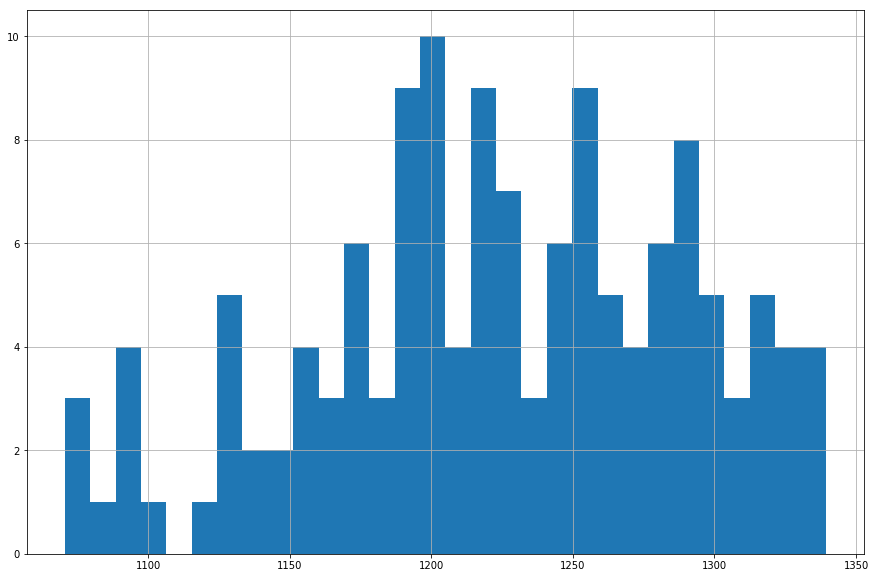

In [16]:
data['Gold_Settle'].hist(bins=30, figsize=(15,10))

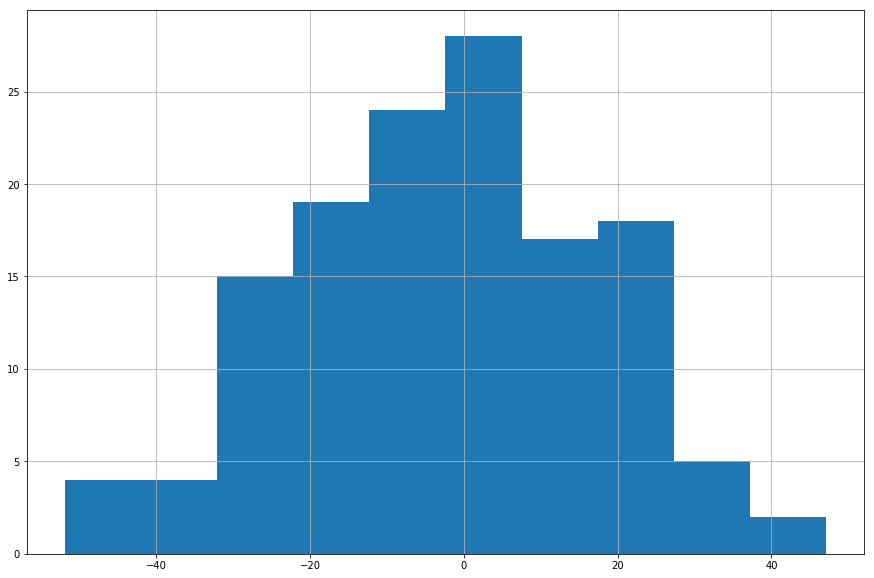

In [18]:
data['Gold_Settle_Diff'].hist(bins=10, figsize=(15,10))